In [6]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt

VolumetricData = pd.read_csv(r'C:\Users\abhar\Downloads\Volumetric_RegressionDataSet.csv')


In [7]:
X = VolumetricData.drop(['Age'],axis = 1)
Y = VolumetricData.Age.values

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error  
from scipy.stats import gaussian_kde
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)


In [25]:
#Linear Regression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, Y_train)
Linear_Regression.predict(X_test)

meanabserror=metrics.mean_absolute_error(Y_test, Linear_Regression.predict(X_test))
print('The mean absolute error of this model, considering age is',meanabserror)
rootmeanabserror=math.sqrt(meanabserror)
print('The root mean absolute error of this model, considering age is',rootmeanabserror)
meansqrerror=metrics.mean_squared_error(Y_test, Linear_Regression.predict(X_test))
print('The mean square error of this model, considering age is', meansqrerror)
r2 = metrics.r2_score(Y_test, Linear_Regression.predict(X_test))
print('The r^2 value of the model is',r2)
print('The accuracy of this model is:', Linear_Regression.score(X_test,Y_test)*100,'%')

The mean absolute error of this model, considering age is 6.169399162754196
The root mean absolute error of this model, considering age is 2.4838275227467377
The mean square error of this model, considering age is 62.6671449770635
The r^2 value of the model is 0.8451353955388898
The accuracy of this model is: 84.51353955388899 %


The testing accuracy for MLRM is:  0.8427807311711666
RMSE for Testing Data is:  7.976213255503165
The r^2 value of the model is 0.8451353955388898


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


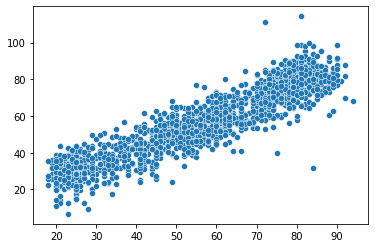

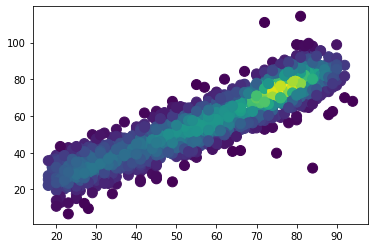

In [41]:
#Multiple Linear Regression
multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(X_train, Y_train)

y_pred_MLR_train = multiple_linear_reg.predict(X_train)
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

accuracy_MLR_test = r2_score(Y_test, y_pred_MLR_test)
print("The testing accuracy for MLRM is: ", accuracy_MLR_test)
RMSE_MLR_test = math.sqrt(mean_squared_error(Y_test, y_pred_MLR_test))
print("RMSE for Testing Data is: ", RMSE_MLR_test)
r2_MLR = metrics.r2_score(Y_test,y_pred_MLR_test)
print('The r^2 value of the model is',r2)

sns.scatterplot(Y_test, y_pred_MLR_test)

XY = np.vstack([Y_test,y_pred_MLR_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(Y_test,y_pred_MLR_test, c=z, s=100)
plt.show()

In [20]:
#Neural Network
#NN_reg = MLPRegressor()
#NN_reg.fit(X_train,Y_train)
#print(NN_reg)


#Y_predict = NN_reg.predict(X_test)
#NN_reg.score(Y_test,Y_predict)
#accuracy_NNreg = r2_score(Y_test, Y_predict)
#print("The testing accuracy for NN_reg is: ", accuracy_NNreg)
#RMSE_NN_test = math.sqrt(mean_squared_error(Y_test,NN_reg.predict(X_test)))
#print("RMSE for Testing Data is: ", RMSE_NN_test)
#r2_NN = metrics.r2_score(Y_test,NN_reg.predict(X_test))
#print('The r^2 value of the model is',r2_NN)

#sns.scatterplot(Y_test,NN_reg.predict(X_test))
#XY1 = np.vstack([Y_test,Y_predict])
#z = gaussian_kde(XY1)(XY1)
#fig, ax = plt.subplots()
#ax.scatter(Y_test,Y_predict, c=z, s=100)
#plt.show()

MLPRegressor()


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[58 33 63 ... 74 28 74].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

MLPRegressor()
-2613.0412020012086


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


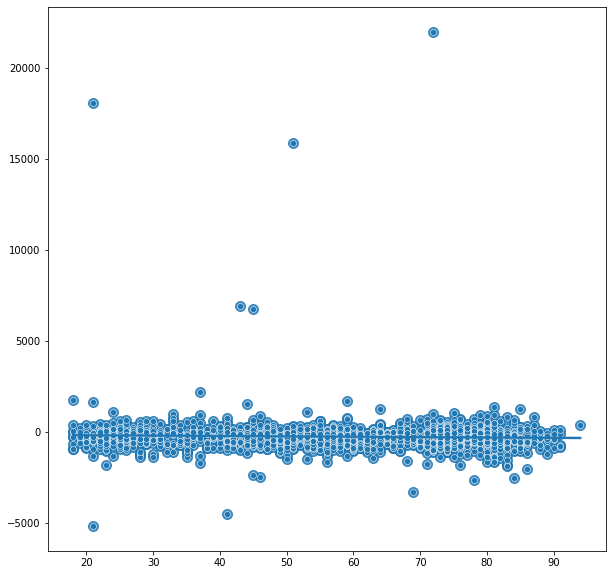

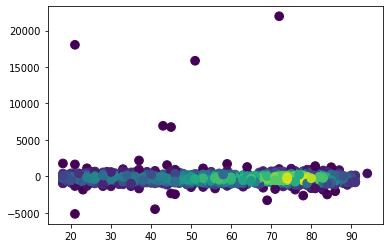

In [30]:
model = MLPRegressor()
model.fit(X_train, Y_train)
print(model)

model.predict(X_test)
print(metrics.r2_score(Y_test,model.predict(X_test)))
plt.figure(figsize=(10,10))
sns.regplot(Y_test, model.predict(X_test), fit_reg=True, scatter_kws={"s": 100})

sns.scatterplot(Y_test,model.predict(X_test))
XY2 = np.vstack([Y_test,model.predict(X_test)])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
ax.scatter(Y_test,model.predict(X_test), c=z, s=75)
plt.show()

The accuracy of this model is: 69.3695263205497 %


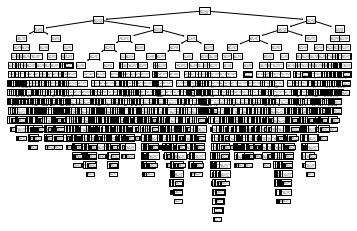

In [46]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
tree.plot_tree(DTree)
DTree.predict(X_test)

print('The accuracy of this model is:', DTree.score(X_test,Y_test)*100, '%')